<a href="https://colab.research.google.com/github/Jim030123/BTMH1013_ASG/blob/main/BTMH1013_2024C_Assignment_B240048A_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: can you retrieve google drive content? BTMH1023 file's Red Swan (Attack on Titan anime theme) - 進撃の巨人 Official Lyric Video YOSHIKI feat. HYDE.mp3 if exist print exist

from google.colab import drive
drive.mount('/content/drive')

import os

file_path = "/content/drive/MyDrive/BTMH1023/Red Swan (Attack on Titan anime theme) - 進撃の巨人 Official Lyric Video YOSHIKI feat. HYDE.mp3"

if os.path.exists(file_path):
  print("exist")
else:
  print("The specified file does not exist in your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
exist


In [ ]:
!pip install mido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.2 MB/s eta 0:00:00


Q2 (a) Data preparation

Convert from MP3 to CSV and MIDI

In [18]:
import librosa
import numpy as np
import csv
import os
import pandas as pd
from mido import Message, MidiFile, MidiTrack

from google.colab import drive
drive.mount('/content/drive')

import os

audio_file = "/content/drive/MyDrive/BTMH1023/Frieren Theme Song.mp3"


y, sr = librosa.load(audio_file, sr=None)  # y is the audio time series, sr is the sample rate

# Extract pitch (fundamental frequency) using librosa
harmonic = librosa.effects.harmonic(y)

# Use librosa's piptrack function to extract pitch
pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr)

# Extract the most prominent pitch for each frame
times = librosa.times_like(pitches)
detected_notes = []
for t, frame in zip(times, pitches.T):
    # Get the index of the most prominent pitch
    index = frame.argmax()
    pitch = frame[index]  # Frequency of the most prominent pitch
    if pitch > 0:  # Filter out zero values (no pitch detected)
        # Convert the pitch to MIDI note number (this is approximate)
        midi_note = librosa.hz_to_midi(pitch)
        detected_notes.append((midi_note, t))

# Initialize a new MIDI file and track
midi_file = MidiFile()
track = MidiTrack()
midi_file.tracks.append(track)

# Add notes to the MIDI track
previous_time = 0  # To calculate time differences
for note, time in detected_notes:
    midi_note = int(note)
    # Convert time difference to MIDI ticks (assuming 500ms per tick as a rough example)
    delta_time = int((time - previous_time) * 1000 / 500)  # Roughly based on tempo
    previous_time = time
    # Add MIDI note on and note off messages
    track.append(Message('note_on', note=midi_note, velocity=64, time=delta_time))
    track.append(Message('note_off', note=midi_note, velocity=64, time=200))  # Fixed duration

# Save the MIDI file
midi_filename = f"{os.path.splitext(audio_file)[0]}.mid"
midi_file.save(midi_filename)

print(f"MIDI file '{midi_filename}' created successfully.")

# Load your MIDI file
midi_file_loaded = MidiFile(midi_filename)

detected_notes_csv = []
current_time = 0
for track in midi_file_loaded.tracks:
    for message in track:
        if message.type == 'note_on' and message.velocity > 0:
            midi_note = message.note
            time = current_time
            detected_notes_csv.append((midi_note, time))
        current_time += message.time  # Update current time based on MIDI ticks

# Write the detected notes, timing to a CSV file
csv_filename = f"{os.path.splitext(audio_file)[0]}.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['MIDI Note', 'Time (ticks)'])  # CSV header

    for note, time in detected_notes_csv:
        writer.writerow([note, time])

print(f"CSV file '{csv_filename}' created successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MIDI file '/content/drive/MyDrive/BTMH1023/Frieren Theme Song.mid' created successfully.
CSV file '/content/drive/MyDrive/BTMH1023/Frieren Theme Song.csv' created successfully.


In [ ]:
import librosa
import numpy as np
import csv
import os
import pandas as pd
from mido import Message, MidiFile, MidiTrack

from google.colab import drive
drive.mount('/content/drive')

import os

audio_file = "/content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.mp3"


y, sr = librosa.load(audio_file, sr=None)  # y is the audio time series, sr is the sample rate

# Extract pitch (fundamental frequency) using librosa
harmonic = librosa.effects.harmonic(y)

# Use librosa's piptrack function to extract pitch
pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr)

# Extract the most prominent pitch for each frame
times = librosa.times_like(pitches)
detected_notes = []
for t, frame in zip(times, pitches.T):
    # Get the index of the most prominent pitch
    index = frame.argmax()
    pitch = frame[index]  # Frequency of the most prominent pitch
    if pitch > 0:  # Filter out zero values (no pitch detected)
        # Convert the pitch to MIDI note number (this is approximate)
        midi_note = librosa.hz_to_midi(pitch)
        detected_notes.append((midi_note, t))

# Initialize a new MIDI file and track
midi_file = MidiFile()
track = MidiTrack()
midi_file.tracks.append(track)

# Add notes to the MIDI track
previous_time = 0  # To calculate time differences
for note, time in detected_notes:
    midi_note = int(note)
    # Convert time difference to MIDI ticks (assuming 500ms per tick as a rough example)
    delta_time = int((time - previous_time) * 1000 / 500)  # Roughly based on tempo
    previous_time = time
    # Add MIDI note on and note off messages
    track.append(Message('note_on', note=midi_note, velocity=64, time=delta_time))
    track.append(Message('note_off', note=midi_note, velocity=64, time=200))  # Fixed duration

# Save the MIDI file
midi_filename = f"{os.path.splitext(audio_file)[0]}.mid"
midi_file.save(midi_filename)

print(f"MIDI file '{midi_filename}' created successfully.")

# Load your MIDI file
midi_file_loaded = MidiFile(midi_filename)

detected_notes_csv = []
current_time = 0
for track in midi_file_loaded.tracks:
    for message in track:
        if message.type == 'note_on' and message.velocity > 0:
            midi_note = message.note
            time = current_time
            detected_notes_csv.append((midi_note, time))
        current_time += message.time  # Update current time based on MIDI ticks

# Write the detected notes, timing to a CSV file
csv_filename = f"{os.path.splitext(audio_file)[0]}.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['MIDI Note', 'Time (ticks)'])  # CSV header

    for note, time in detected_notes_csv:
        writer.writerow([note, time])

print(f"CSV file '{csv_filename}' created successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MIDI file '/content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.mid' created successfully.
CSV file '/content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.csv' created successfully.


In [19]:
import librosa
import numpy as np
import csv
import os
import pandas as pd
from mido import Message, MidiFile, MidiTrack

from google.colab import drive
drive.mount('/content/drive')

import os

audio_file = "/content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mp3"


y, sr = librosa.load(audio_file, sr=None)  # y is the audio time series, sr is the sample rate

# Extract pitch (fundamental frequency) using librosa
harmonic = librosa.effects.harmonic(y)

# Use librosa's piptrack function to extract pitch
pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr)

# Extract the most prominent pitch for each frame
times = librosa.times_like(pitches)
detected_notes = []
for t, frame in zip(times, pitches.T):
    # Get the index of the most prominent pitch
    index = frame.argmax()
    pitch = frame[index]  # Frequency of the most prominent pitch
    if pitch > 0:  # Filter out zero values (no pitch detected)
        # Convert the pitch to MIDI note number (this is approximate)
        midi_note = librosa.hz_to_midi(pitch)
        detected_notes.append((midi_note, t))

# Initialize a new MIDI file and track
midi_file = MidiFile()
track = MidiTrack()
midi_file.tracks.append(track)

# Add notes to the MIDI track
previous_time = 0  # To calculate time differences
for note, time in detected_notes:
    midi_note = int(note)
    # Convert time difference to MIDI ticks (assuming 500ms per tick as a rough example)
    delta_time = int((time - previous_time) * 1000 / 500)  # Roughly based on tempo
    previous_time = time
    # Add MIDI note on and note off messages
    track.append(Message('note_on', note=midi_note, velocity=64, time=delta_time))
    track.append(Message('note_off', note=midi_note, velocity=64, time=200))  # Fixed duration

# Save the MIDI file
midi_filename = f"{os.path.splitext(audio_file)[0]}.mid"
midi_file.save(midi_filename)

print(f"MIDI file '{midi_filename}' created successfully.")

# Load your MIDI file
midi_file_loaded = MidiFile(midi_filename)

detected_notes_csv = []
current_time = 0
for track in midi_file_loaded.tracks:
    for message in track:
        if message.type == 'note_on' and message.velocity > 0:
            midi_note = message.note
            time = current_time
            detected_notes_csv.append((midi_note, time))
        current_time += message.time  # Update current time based on MIDI ticks

# Write the detected notes, timing to a CSV file
csv_filename = f"{os.path.splitext(audio_file)[0]}.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['MIDI Note', 'Time (ticks)'])  # CSV header

    for note, time in detected_notes_csv:
        writer.writerow([note, time])

print(f"CSV file '{csv_filename}' created successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MIDI file '/content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mid' created successfully.
CSV file '/content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.csv' created successfully.


Q2 (b) Find the most used melody or notes.

Analysis from CSV from each anime theme song

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Audio Analysis Tool for 3 Files

Analyzing: /content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mp3
Sample rate: 44100, Duration: 282.42 seconds
Harmonic and percussive components separated.
Pitch tracking completed.

Most common notes:
Note: F♯5, Count: 1537
Note: D4, Count: 1309
Note: C♯6, Count: 1288
Note: E5, Count: 1044
Note: A5, Count: 1017
Note: A3, Count: 925
Note: F5, Count: 912
Note: F4, Count: 703
Note: C6, Count: 696
Note: F3, Count: 691

Analyzing: /content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.mp3
Sample rate: 44100, Duration: 269.33 seconds
Harmonic and percussive components separated.
Pitch tracking completed.

Most common notes:
Note: F5, Count: 2753
Note: A♯3, Count: 1875
Note: A3, Count: 1840
Note: C4, Count: 1719
Note: F4, Count: 1230
Note: A5, Count: 1225
Note: G5, Count: 973
Note: C♯4, Count: 809
Note: G3, Count: 806

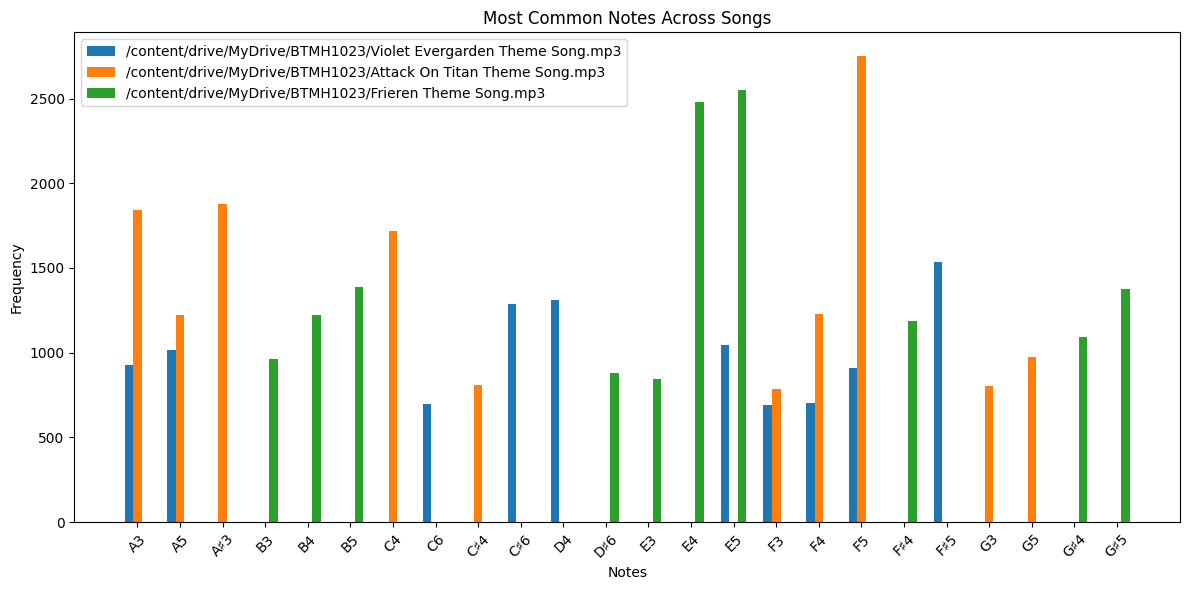

In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

import os



def analyze_song(audio_path):
    print(f"\nAnalyzing: {audio_path}")

    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    print(f"Sample rate: {sr}, Duration: {len(y) / sr:.2f} seconds")

    # Separate harmonic (melody) and percussive components
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    print("Harmonic and percussive components separated.")

    # Extract pitches and magnitudes from the harmonic component
    pitches, magnitudes = librosa.piptrack(y=y_harmonic, sr=sr)
    print("Pitch tracking completed.")

    # Process pitches to extract the most frequent ones
    used_pitches = []
    for frame in range(pitches.shape[1]):
        pitch_frame = pitches[:, frame]
        magnitude_frame = magnitudes[:, frame]
        if magnitude_frame.any():  # Only consider frames with some magnitude
            pitch = pitch_frame[np.argmax(magnitude_frame)]  # Get the pitch with the max magnitude
            if pitch > 0:  # Ignore zero-pitch (silence)
                used_pitches.append(round(pitch, 2))  # Round for simplicity

    # Convert pitches to musical notes
    note_names = []
    for pitch in used_pitches:
        midi_number = librosa.hz_to_midi(pitch)
        note_name = librosa.midi_to_note(midi_number)
        note_names.append(note_name)

    # Count the frequency of each note
    note_counts = Counter(note_names)
    most_common_notes = note_counts.most_common(10)

    print("\nMost common notes:")
    for note, count in most_common_notes:
        print(f"Note: {note}, Count: {count}")

    return most_common_notes


def plot_combined_results(results, file_names):
    # Combine all unique notes
    all_notes = set()
    for result in results:
        all_notes.update([note for note, _ in result])
    all_notes = sorted(all_notes)  # Sort notes alphabetically for clarity

    # Prepare data for plotting
    note_frequencies = {file_name: [0] * len(all_notes) for file_name in file_names}
    for file_name, result in zip(file_names, results):
        for note, count in result:
            index = all_notes.index(note)
            note_frequencies[file_name][index] = count

    # Plot the data
    x = np.arange(len(all_notes))
    width = 0.2  # Bar width

    plt.figure(figsize=(12, 6))
    for i, file_name in enumerate(file_names):
        plt.bar(x + i * width, note_frequencies[file_name], width, label=file_name)

    plt.xlabel("Notes")
    plt.ylabel("Frequency")
    plt.title("Most Common Notes Across Songs")
    plt.xticks(x + width, all_notes, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


def main():
    print("Audio Analysis Tool for 3 Files")

    # Input file paths
    audio_files = [
        # input("Enter the path for Audio File 1: ").strip(),
        # input("Enter the path for Audio File 2: ").strip(),
        # input("Enter the path for Audio File 3: ").strip(),
        "/content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mp3",
        "/content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.mp3",
        "/content/drive/MyDrive/BTMH1023/Frieren Theme Song.mp3"
    ]

    # Analyze each file and collect results
    results = []
    for audio_file in audio_files:
        try:
            results.append(analyze_song(audio_file))
        except Exception as e:
            print(f"Error analyzing {audio_file}: {e}")
            results.append([])

    # Plot combined results
    plot_combined_results(results, audio_files)


if __name__ == "__main__":
    main()


Q2 (c) Create a graph that shows the commonly used notes and their transitions in a melody inspired by Japanese anime BGM.  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Rhythms for /content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mp3: [0.37, 0.39, 0.37, 0.37, 0.49, 0.42, 0.39, 0.39, 0.44, 0.42, 0.44, 0.42, 0.42, 0.42, 0.37, 0.39, 0.44, 0.42, 0.42, 0.44, 0.42, 0.44, 0.49, 0.49, 0.42, 0.44, 0.42, 0.42, 0.44, 0.39, 0.42, 0.42, 0.37, 0.35, 0.35, 0.39, 0.42, 0.42, 0.42, 0.39, 0.39, 0.46, 0.42, 0.42, 0.42, 0.42, 0.42, 0.39, 0.39, 0.44, 0.42, 0.42, 0.42, 0.42, 0.39, 0.42, 0.42, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.39, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.39, 0.42, 0.44, 0.39, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.39, 0.44, 0.42, 0.39, 0.42, 0.42, 0.44, 0.39, 0.42, 0.42, 0.37, 0.39, 0.44, 0.39, 0.44, 0.44, 0.39, 0.44, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.39, 0.44, 0.42, 0.39, 0.42, 0.39, 0.46, 0.42, 0.42, 0.42, 0.42, 0.39, 

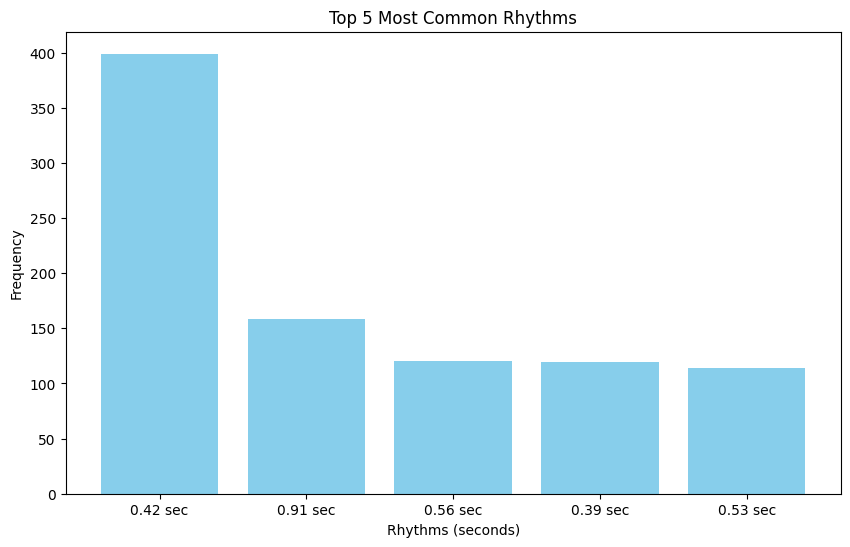

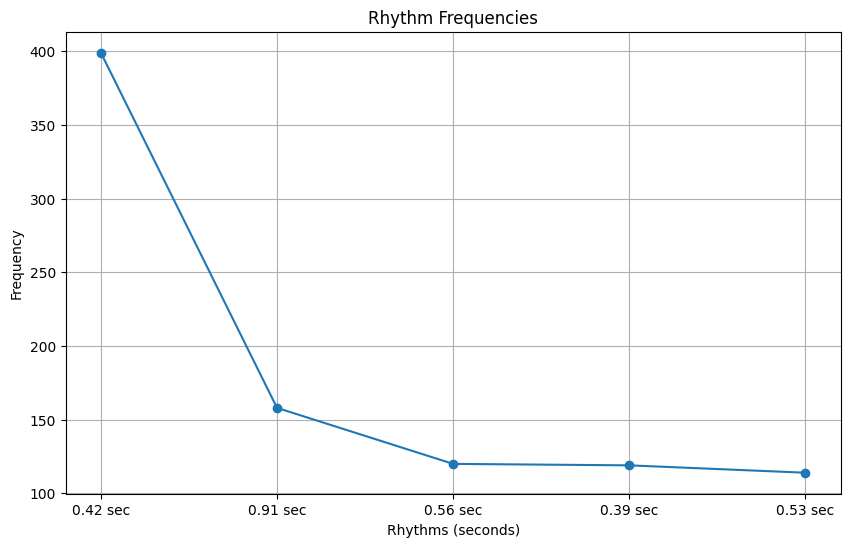

In [24]:
import librosa
import csv
# import networkx as nx  # Removed NetworkX import
import matplotlib.pyplot as plt
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

import os


def analyze_rhythms(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Detect tempo and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

    # Convert beat frames to timestamps
    beat_times = librosa.frames_to_time(beat_frames, sr=sr)

    # Calculate intervals (rhythms) between beats
    rhythms = [round(beat_times[i] - beat_times[i - 1], 2) for i in range(1, len(beat_times))]

    return rhythms

def get_top_rhythms(rhythms, top_n=5):
    # Count the most common rhythms
    rhythm_counts = Counter(rhythms)
    return [rhythm for rhythm, _ in rhythm_counts.most_common(top_n)]


# Analyze rhythms in multiple audio files
audio_files = [ "/content/drive/MyDrive/BTMH1023/Violet Evergarden Theme Song.mp3",
        "/content/drive/MyDrive/BTMH1023/Attack On Titan Theme Song.mp3",
        "/content/drive/MyDrive/BTMH1023/Frieren Theme Song.mp3"]
all_rhythms = []

for file in audio_files:
    rhythms = analyze_rhythms(file)
    print(f"Rhythms for {file}: {rhythms}")
    all_rhythms.extend(rhythms)

# Get the most common 5 rhythms and their counts
top_rhythms = get_top_rhythms(all_rhythms, top_n=5)
print(f"Top 5 Rhythms: {top_rhythms}")

# Define rhythm_counts and top_rhythm_counts before writing to CSV
rhythm_counts = Counter(all_rhythms)
top_rhythm_counts = {rhythm: rhythm_counts[rhythm] for rhythm in top_rhythms}

# Write top rhythms to CSV
with open('top_rhythms.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Rhythm (seconds)', 'Frequency'])
    for rhythm in top_rhythms:
        writer.writerow([rhythm, top_rhythm_counts[rhythm]])



# Plot bar chart for top rhythms
rhythm_counts = Counter(all_rhythms)
top_rhythm_counts = {rhythm: rhythm_counts[rhythm] for rhythm in top_rhythms}

plt.figure(figsize=(10, 6))
plt.bar([f"{rhythm} sec" for rhythm in top_rhythms], top_rhythm_counts.values(), color='skyblue')
plt.xlabel('Rhythms (seconds)')
plt.ylabel('Frequency')
plt.title('Top 5 Most Common Rhythms')
plt.show()

# Add a new plot graph (e.g., line plot of rhythm frequencies)
plt.figure(figsize=(10, 6))
plt.plot([f"{rhythm} sec" for rhythm in top_rhythms], top_rhythm_counts.values(), marker='o', linestyle='-')
plt.xlabel('Rhythms (seconds)')
plt.ylabel('Frequency')
plt.title('Rhythm Frequencies')
plt.grid(True)
plt.show()


Q2 (d) Create a 30-second simple audio piece inspired by Japanese anime BGM. Rename the audio piece in your student ID. Upload the music file to Assignment.

In [32]:
!pip install pydub
!apt install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [34]:
import numpy as np
from pydub import AudioSegment
from pydub.generators import Sine

# Notes frequency mapping (in Hz)
NOTE_FREQUENCIES = {
    'A3': 220.00, 'C4': 261.63, 'D4': 293.66, 'E4': 329.63,
    'F4': 349.23, 'G4': 392.00, 'A4': 440.00, 'B4': 493.88,
    'C5': 523.25, 'D5': 587.33, 'E5': 659.26, 'F#4': 369.99, 'G#4': 415.30,
    'C#5': 554.37, 'D#5': 622.25, 'F#5': 739.99, 'G#5': 830.61
}

# Define chords (triads) for harmonization
CHORDS = {
    'C': ['C4', 'E4', 'G4'],  # C Major
    'D': ['D4', 'F#4', 'A4'],  # D Major
    'E': ['E4', 'G#4', 'B4'],  # E Major
    'F': ['F4', 'A4', 'C5'],  # F Major
    'G': ['G4', 'B4', 'D5'],  # G Major
    'A': ['A4', 'C#5', 'E5'],  # A Major
    'B': ['B4', 'D#5', 'F#5'],  # B Major
    'Am': ['A4', 'C5', 'E5'],  # A Minor
    'Em': ['E4', 'G4', 'B4'],  # E Minor
    'Dm': ['D4', 'F4', 'A4'],  # D Minor
}

# Function to generate a chord
def generate_chord(root_note, duration):
    """Generate a chord for the given root note."""
    if root_note in CHORDS:
        # Combine multiple notes to form a chord
        chord_notes = [Sine(NOTE_FREQUENCIES[note]).to_audio_segment(duration=duration) for note in CHORDS[root_note]]
        return sum(chord_notes)  # Sum combines them into a chord
    else:
        # If no chord is defined, play the single note
        return Sine(NOTE_FREQUENCIES[root_note]).to_audio_segment(duration=duration)

# Function to create background music with chords
def create_bgm_with_chords(melody):
    """Create background music with chords from a given melody."""
    bgm = AudioSegment.silent(duration=0)  # Start with silence
    for root_note, duration in melody:
        bgm += generate_chord(root_note, duration)  # Add chords to the BGM
    return bgm

# Inspired melodies with root notes for chords
melody_aot = [('E', 400), ('G', 400), ('C', 400), ('E', 600),
              ('G', 400), ('B', 400), ('C', 800)]
melody_violet = [('C', 600), ('E', 800), ('A', 600), ('G', 400),
                 ('F', 400), ('E', 800), ('D', 1000)]
melody_frieren = [('A', 700), ('C', 700), ('E', 700), ('F', 900),
                  ('E', 700), ('D', 700), ('A', 900)]


# Generate BGMs with chords
bgm_aot = create_bgm_with_chords(melody_aot)
bgm_violet = create_bgm_with_chords(melody_violet)
bgm_frieren = create_bgm_with_chords(melody_frieren)

# Combine BGMs
full_bgm = bgm_aot + bgm_violet + bgm_frieren

# Save as MP3
output_path = "B240048A.mp3"
full_bgm.export(output_path, format="mp3")
print(f"Enriched BGM saved to {output_path}")


Enriched BGM saved to B240048A.mp3
